In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import xgboost as xgb
import joblib

In [46]:
df = pd.read_csv('historical_data.csv')

In [47]:
X = df.drop(columns=['Yield (kg/acre)'])
y = df['Yield (kg/acre)']
print(X)
print(y)

       Chlorophyll Content (mg/m²)  Water (liters/day)  Nitrogen (mg/L)  \
0                       419.525402           75.572816        42.460739   
1                       486.075747           40.603822        29.043359   
2                       441.105350           68.549572        30.926240   
3                       417.953273           82.526223        20.020823   
4                       369.461920           42.638526        34.201721   
...                            ...                 ...              ...   
19994                   526.184571           53.589747        46.529622   
19995                   482.742938           78.710367        30.453696   
19996                   491.602867           50.461986        30.060652   
19997                   508.508139           81.456264        41.931807   
19998                   229.617861           63.204121        35.998557   

       Rainfall (mm/year)  Temperature (°C)  
0              848.377497         19.170568  
1      

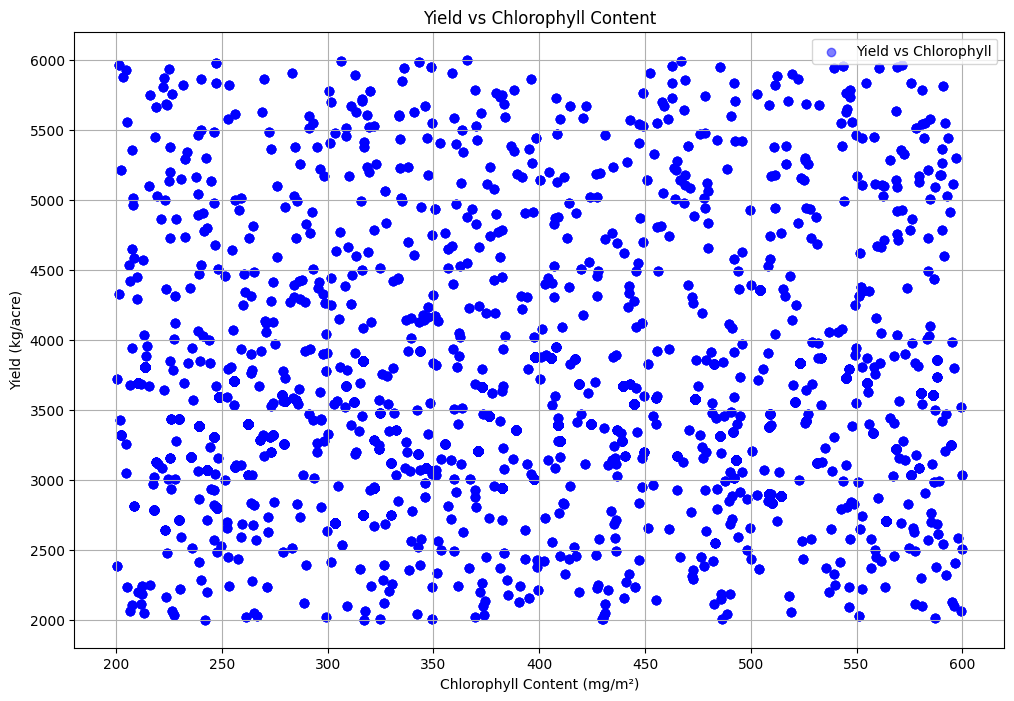

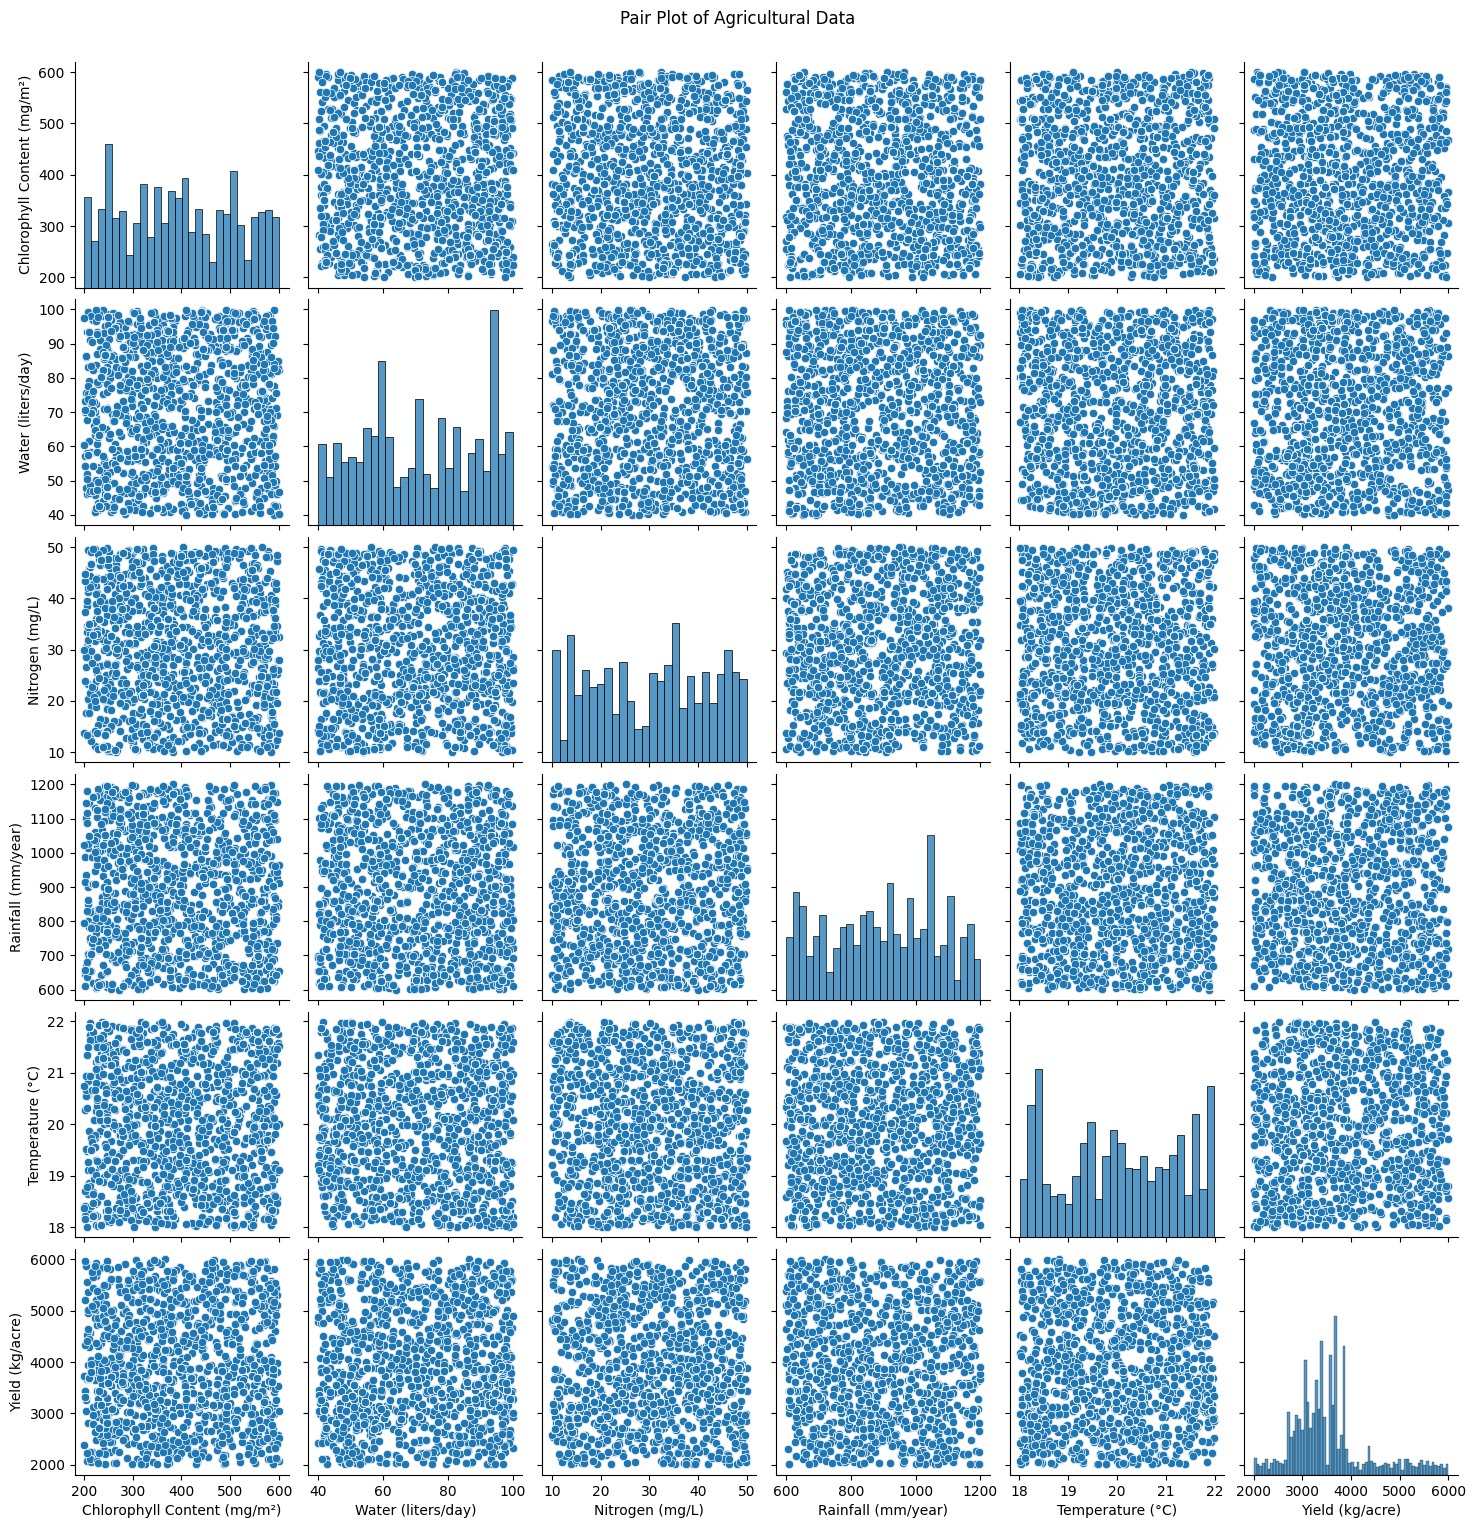

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
plt.scatter(df['Chlorophyll Content (mg/m²)'], df['Yield (kg/acre)'], 
            c='blue', alpha=0.5, label='Yield vs Chlorophyll')
plt.title('Yield vs Chlorophyll Content')
plt.xlabel('Chlorophyll Content (mg/m²)')
plt.ylabel('Yield (kg/acre)')
plt.legend()
plt.grid()
plt.show()

# Pair Plot
sns.pairplot(df)
plt.suptitle('Pair Plot of Agricultural Data', y=1.02)
plt.show()

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
model = xgb.XGBRegressor(random_state=42)

# Parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 12],
    'gamma': [0, 0.1, 0.3, 0.5, 1],
    'min_child_weight': [1, 3, 5, 7],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'colsample_bynode': [0.6, 0.8, 1.0],
    'subsample': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],  # L1 regularization term
    'reg_lambda': [1, 1.5, 2, 5, 10],  # L2 regularization term
    'max_delta_step': [0, 1, 3, 5],
    'max_bin': [256, 512, 1024],
    'grow_policy': ['depthwise', 'lossguide'],
}

# Set up the Randomized Search
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to try
    scoring='neg_mean_squared_error',
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available nodes for computation
)

# Fit the Randomized Search on the training data
random_search.fit(x_train, y_train)

# Best parameters and score
best_parameters = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_parameters)
print("Best Score:", best_score)

In [51]:
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.3,
    max_depth=9,
    random_state=42,
    gamma= 1,
    min_child_weight=1,
    subsample=0.6,
    reg_lambda = 1,
    reg_alpha = 0.01,
    max_delta_step = 0,
    max_bin = 512,
    grow_policy= 'lossguide',
    colsample_bytree = 1,
    colsample_bynode=0.8,
    colsample_bylevel=1.0
)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=1.0, colsample_bynode=0.8, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1,
             grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=512,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=9, max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [52]:
y_pred = model.predict(x_test)

In [53]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.33217279624873036
R² Score: 0.9999994783884759


In [54]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy_percentage = (1 - mape) * 100  # Convert MAPE to accuracy percentage

print(f"Model accuracy (based on MAPE): {accuracy_percentage:.2f}%")


Model accuracy (based on MAPE): 99.99%


In [55]:
new_df = pd.read_csv('synthetic_apple_farm_data.csv')

In [56]:
new_df.sample(5)

,Chlorophyll Content (mg/m²),Water (liters/day),Nitrogen (mg/L),Rainfall (mm/year),Temperature (°C),Yield (kg/acre)
1037,349.816048,41.885751,35.681266,631.009033,18.412495,3065.884464
71,279.486273,40.995270,42.404536,610.933095,21.879515,3259.030124
184,349.816048,41.885751,35.681266,631.009033,18.412495,3065.884464
114,279.869513,89.080886,48.920422,932.612432,19.766122,3562.326270
627,504.314019,94.025083,42.904022,823.210851,19.109525,4358.507727


In [57]:
input_data=new_df.drop(columns=['Yield (kg/acre)'])
input_data.sample(5)

,Chlorophyll Content (mg/m²),Water (liters/day),Nitrogen (mg/L),Rainfall (mm/year),Temperature (°C)
194,243.156571,86.792533,13.413899,1052.725724,21.944843
1255,409.902573,51.194204,39.859656,703.976592,19.314658
1207,255.797544,93.765478,32.732344,1028.757554,21.158473
1192,508.386872,60.341787,15.082421,804.482124,19.854794
1163,594.754775,75.453577,21.743674,641.616781,21.852890


In [58]:
predictions = model.predict(input_data)

In [59]:
output_df = pd.DataFrame(predictions, columns=['Predicted_Values'])

# Step 2: Save the DataFrame to a CSV file
output_df.to_csv('predictions_output.csv', index=False)

print("Predictions have been saved to 'predictions_output.csv'")

Predictions have been saved to 'predictions_output.csv'
